# Daily Birth Dataset 

This dataset describes the number of daily female births in California in 1959.
The units are a count and there are 365 observations. The source of the dataset is credited to Newton (1988).

## Load and Visualize Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error

birth_df = read_csv("Datasets/Daily_Birth_Data.csv", index_col=0, header=0)

display(birth_df.head())

,Births
Date,
1/1/1959,35
1/2/1959,32
1/3/1959,30
1/4/1959,31
1/5/1959,44


## Visualize Data

<Figure size 1200x600 with 0 Axes>

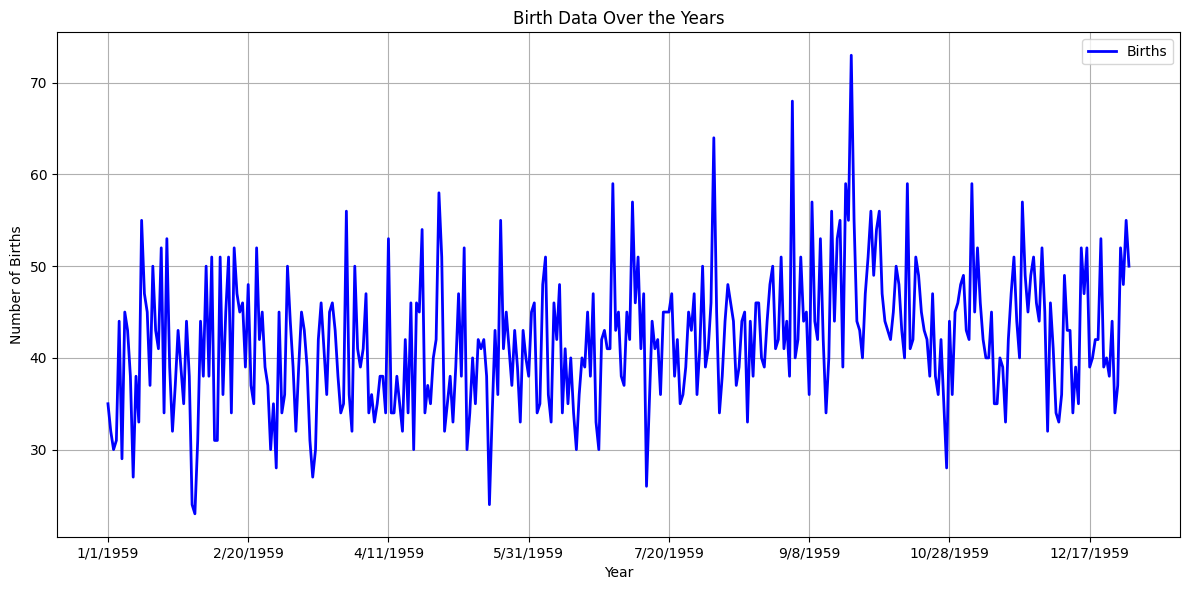

In [2]:
# Plot size
plt.figure(figsize=(12, 6))

# Plot the data
birth_df.plot(kind='line', color='b', linestyle='-', linewidth=2, markersize=8, figsize=(12, 6))

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.title("Birth Data Over the Years")

# Add grid lines
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## Split Data into Train and Test.

In [3]:

birth_df = pd.concat([birth_df.shift(1), birth_df], axis=1)
birth_df.columns = ['Day-1', 'Day']

# split into train and test sets
X = birth_df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

print("Total Numver of samples:", len(X))
print("Traning Dataset size:", len(train))
print("Testing Dataset size:", len(test))

Total Numver of samples: 365
Traning Dataset size: 239
Testing Dataset size: 125


## Baseline Model

In [4]:
# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 83.744


## Plot Predictions and Results

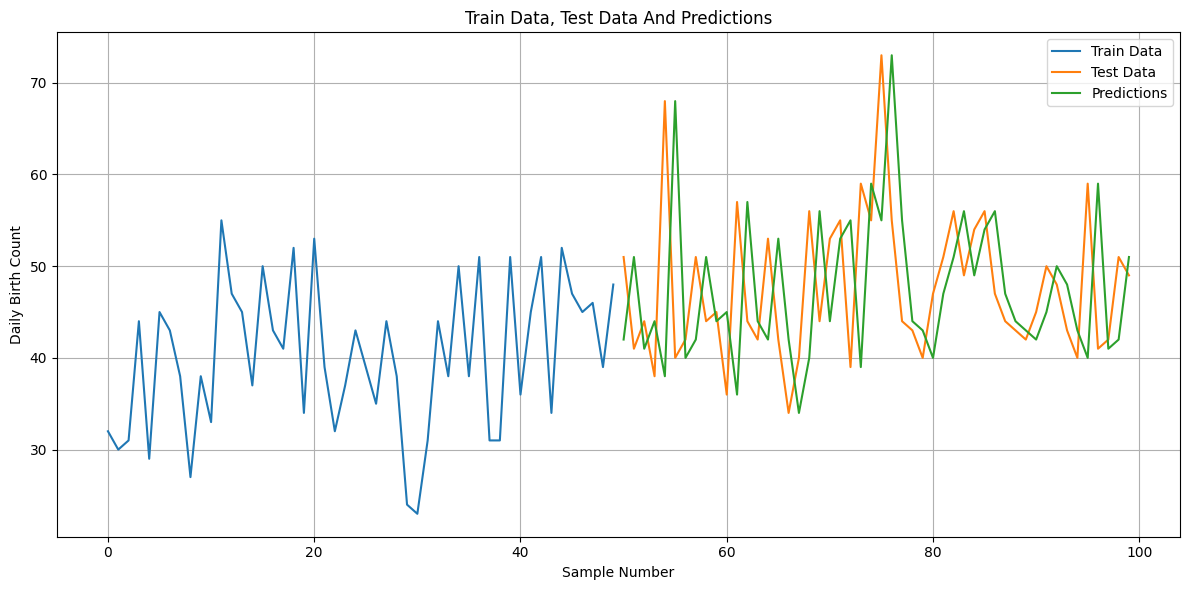

In [5]:
plt.figure(figsize=(12, 6)) 

plt.plot(train_y[:50], label='Train Data')
plt.plot(np.concatenate((np.full(50, np.nan), test_y[:50])), label='Test Data')
plt.plot(np.concatenate((np.full(50, np.nan), predictions[:50])), label='Predictions')
plt.xlabel("Sample Number")
plt.ylabel("Daily Birth Count")
plt.title("Train Data, Test Data And Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
